# Reporte escrito 2

In [ ]:
# Instala dependencias
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte2.sav
!pip install pingouin
!pip install pyreadstat

En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, F, r, R2 B, ß) así como el valor p correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

## Pregunta 1

La literatura sobre el desarrollo humano temprano indica que la **autoeficacia parental** predice el **compromiso paterno** en la crianza en la niñez. Un grupo de investigación llevó a cabo un estudio para conocer si este factor estima el compromiso reportado por papás en la región Loreto (8 pts).

a) Escribe la hipótesis de trabajo (HT) así como las hipótesis estadísticas (H0 y H1) correspondiente a la variable predictora del modelo a analizar. 

b) Plantea la ecuación del modelo para la HT. 

c) Analiza si existe evidencia de la asociación entre las variables con un gráfico de dispersión y reporta los resultados de la prueba de correlación pertinente.

d) Indica si el modelo presenta un buen ajuste, así como el coeficiente de determinación considerando su variabilidad y magnitud de acuerdo con los criterios de Cohen.

e) Reporta los resultados de los coeficientes del modelo e indica si se cumple la hipótesis del estudio, elaborando tu conclusión.

In [16]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_spss("BaseReporte2.sav")
df

,Código,Edad,AutoeficaciaP,Insatisfacción,Conservadurismo,CompromisoP
0,001,25.0,16.0,25.0,9.0,37.0
1,002,38.0,18.0,17.0,6.0,42.0
2,003,28.0,19.0,16.0,10.0,35.0
3,004,32.0,24.0,23.0,10.0,76.0
4,005,26.0,22.0,21.0,11.0,39.0
...,...,...,...,...,...,...
95,096,37.0,18.0,19.0,8.0,43.0
96,097,48.0,26.0,21.0,10.0,65.0
97,098,35.0,19.0,26.0,12.0,50.0
98,099,30.0,17.0,27.0,14.0,30.0


### Solución

HT: La autoeficacia parental predice el compromiso paterno en la crianza en papás de Loreto.

$H_{0}$: $β_{autoeficacia} = 0$, autoeficacia no predice el compromiso paterno.

$H_{1}$: $β_{autoeficacia} \neq 0$, autoeficacia predice el compromiso paterno.

$Compromiso \ paterno = β_{0} + β_{1}(autoeficacia \ parental) \pm \epsilon$, con $β_{1} \neq 0$

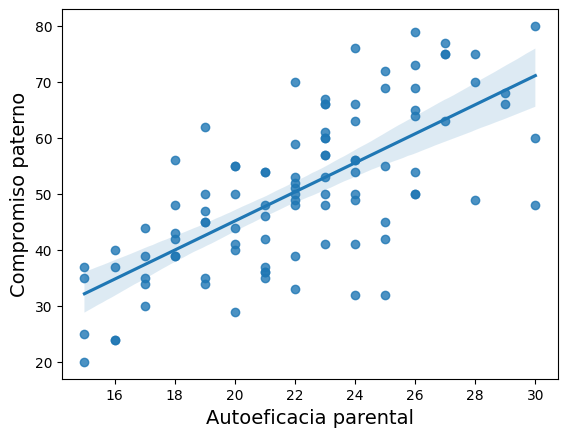

In [18]:
ax = sns.regplot(x="AutoeficaciaP", y="CompromisoP", data=df)
ax.set_xlabel("Autoeficacia parental", size=14)
ax.set_ylabel("Compromiso paterno", size=14)
plt.show()

A partir del gráfico, se observa una posible tendencia lineal positiva entre las variables, de modo que a mayor autoeficacia parental, un mayor compromiso paterno. 

In [4]:
import pingouin as pg

pg.normality(df[["AutoeficaciaP", "CompromisoP"]])

,W,pval,normal
AutoeficaciaP,0.980055,0.134252,True
CompromisoP,0.983924,0.264967,True


De acuerdo con los resultados de la prueba Shapiro-Wilk, todas las variables presentaron distribución normal: autoeficacia parental, SW =.98, p =.13, insatisfacción marital, SW =.98, p =.07, y compromiso paterno, SW =.98, p=.27. Por ello, se utilizó el análisis de correlación de Pearson.

In [7]:
pg.pairwise_corr(
    columns=["AutoeficaciaP", "CompromisoP"],
    method="pearson",
    data=df,
    alternative="two-sided",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AutoeficaciaP,CompromisoP,pearson,two-sided,100,0.69819,"[0.58, 0.79]",6.808635e-16,1.096e+13,1.0


Se encontró una asociación directa significativa entre autoeficacia parental y compromiso paterno r(98) = .70, p<.001, con una magnitud grande, según los criterios de Cohen. 

In [23]:
# Fit regression model
model = smf.ols("CompromisoP ~ AutoeficaciaP", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CompromisoP   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     93.21
Date:                Wed, 17 May 2023   Prob (F-statistic):           6.81e-16
Time:                        07:50:43   Log-Likelihood:                -371.47
No. Observations:                 100   AIC:                             746.9
Df Residuals:                      98   BIC:                             752.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.7784      6.037     -1.123      0.264     -18.758       5.201
AutoeficaciaP     2.5969      0.269      9.654      0.000       2.063       3.131
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.510
Skew:                          -0.265   Prob(JB):                        0.470
Kurtosis:                       2.714   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 10.033045316903534


El resultado de la prueba de ANOVA fue de F(1, 98)=93.21, p<.001, por lo que el modelo es adecuado para estimar el compromiso paterno. 

Además, el R2 ajustado fue .482 por lo que se puede decir que el 48.2% de la variación que se observa en el compromiso paterno se explica por la autoeficacia parental. Según el criterio de Cohen (1988) el coeficiente de determinación es grande.

El análisis de regresión lineal indica que el $β_{0}=-6.78$, p=.264 (no significativo) y $β_{autoeficacia}= 2.60$, $p<.001$.

En el caso de la autoeficacia parental se encontró que predice el compromiso paterno de manera directa y significativa, es decir, a cada incremento de una unidad en autoeficacia se observa un aumento de 2.60 en compromiso paterno. 

Por ello se concluye que la HT se cumple y que la autoeficacia parental predice significativamente el compromiso paterno en papás de Loreto.

## Pregunta 2

De acuerdo con los resultados del modelo analizado previamente, si se cuenta con un participante que puntúa 27 en autoeficacia parental, ¿cuánto sería el puntaje de compromiso paterno estimado? (2 pts)                 

### Solución

$Compromiso \ paterno = 2.60 (autoeficacia) \pm 10.03$

$Compromiso paterno = 70.2 \pm 10.03$

$Compromiso paterno = [59.9, 80.5]$

## Pregunta 3

En el mismo estudio, se evaluó si el conservadurismo era un factor de riesgo en el compromiso paterno en papás de preescolares. Para ello, se planteó conocer si el **conservadurismo** del padre contribuye a un menor **compromiso** en la crianza (8 pts).

a) Redacta la hipótesis de trabajo (HT) y las hipótesis estadísticas respectivas.

b) Plantea la ecuación del modelo para la HT. 

c) Analiza si existe evidencia de la asociación entre las variables con un gráfico de dispersión y reporta los resultados de la prueba de correlación pertinente.

d) Indica si el modelo presenta un buen ajuste, así como el coeficiente de determinación considerando su variabilidad y magnitud de acuerdo con los criterios de Cohen.

e) Reporta los resultados de los coeficientes del modelo e indica si se cumple la hipótesis del estudio, elaborando tu conclusión.

### Solución

HT: El conservadurismo predice un menor compromiso paterno en papás de preescolares en Loreto.

$H_{0}$: $β = 0$, el conservadurismo no predice el compromiso paterno.

$H_{1}$: $β < 0$, el conservadurismo predice un menor compromiso paterno.


$Compromiso \ paterno = β_{0} – β_{1} (conservadurismo) ± \epsilon$, $β < 0$

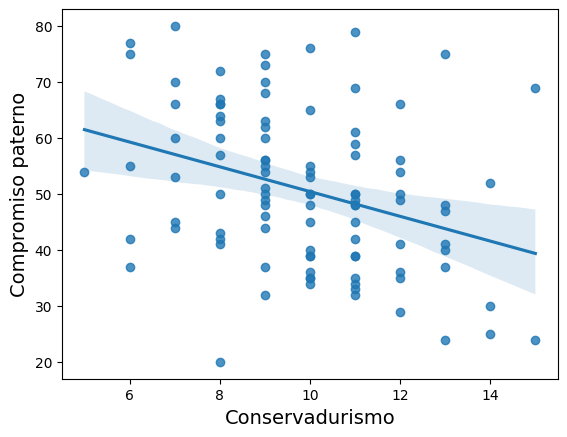

In [19]:
ax = sns.regplot(x="Conservadurismo", y="CompromisoP", data=df)
ax.set_xlabel("Conservadurismo", size=14)
ax.set_ylabel("Compromiso paterno", size=14)
plt.show()

En primer lugar, el diagrama de dispersión sugiere una ligera relación lineal inversa entre las variables debido a que la nube de puntos muestra que altos valores de conservadurismo corresponden con bajos valores de compromiso paterno, y viceversa.

In [20]:
pg.normality(df[["Conservadurismo", "CompromisoP"]])

,W,pval,normal
Conservadurismo,0.976677,0.073023,True
CompromisoP,0.983924,0.264967,True


Tanto conservadurismo, SW =.98, p=.07, como compromiso paterno, SW =.98, p=.27, cuentan con una distribución normal por lo que se utilizará el análsis de correlación de Pearson para corroborar la tendencia del gráfico de dispersión.

In [21]:
pg.pairwise_corr(
    columns=["Conservadurismo", "CompromisoP"],
    method="pearson",
    data=df,
    alternative="less",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Conservadurismo,CompromisoP,pearson,less,100,-0.339069,"[-1.0, -0.18]",0.000279,88.318,0.967808


Existe una asociación lineal inversa significativa y de magnitud mediana entre el conservadurismo y el compromiso paterno, r(98) = –.34, p < .001 (unilateral).

In [26]:
model = smf.ols("CompromisoP ~ Conservadurismo", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CompromisoP   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     12.73
Date:                Wed, 17 May 2023   Prob (F-statistic):           0.000559
Time:                        07:51:04   Log-Likelihood:                -398.79
No. Observations:                 100   AIC:                             801.6
Df Residuals:                      98   BIC:                             806.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.5371      6.263     11.581      0.000      60.108      84.967
Conservadurismo    -2.2112      0.620     -3.568      0.001      -3.441      -0.981
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.349
Skew:                           0.240   Prob(JB):                        0.510
Kurtosis:                       2.696   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
error = np.sqrt(model.mse_resid)
print("Error estándar de la estimación:", error)

Error estándar de la estimación: 13.184156848549414


En cuanto al ajuste del modelo, el ANOVA sugiere que el modelo propuesto es pertinente para predecir cambios en el compromiso paterno, F(1, 98) = 12.73, p = .001.

Asimismo, se obtuvo un R2 de .115, de modo que el 11.5% de la variabilidad de compromiso paterno se explica por el conservadurismo. Según los criterios de Cohen (1988), el coeficiente de determinación es de magnitud mediana.

El análisis de regresión lineal simple muestra que $β_{0} = 72.54$, $p < .001$ y  $β_{conservadurismo} = –2.21$, $p < .001$ (unilateral). 

El conservadurismo predice significativamente un menor compromiso paterno, $β = –2.21$, $EE_{β}=0.62$, $t(98) = –3.57$, $p <.001$, existiendo entre ambos una asociación inversa significativa con un tamaño del efecto mediano, $R^{2} = .115$, $F(1, 98)=12.73$, $p = .001$. 

Así, por cada unidad de conservadurismo, el compromiso paterno disminuye en 2.21. En conclusión, la evidencia estadística sugiere que el conservadurismo reduce el compromiso paterno en papás de preescolares en Loreto.

$Compromiso \ paterno = 72.54 – 2.21 (conservadurismo) \pm 13.18$